In [7]:
import win32com.client
import time
import pandas as pd
import numpy as np

def evFishTracks(processParams, evFiles):
    newFiles = []
    EvApp = win32com.client.Dispatch("EchoviewCom.EvApplication")
    EvApp.Minimize()
    for file in evFiles:
        start = time.time()
        EvFile = EvApp.OpenFile(file)
        EvFileSet = EvFile.FileSets.FindByName('Fileset1') # replace with params value
        EvFileSet.SetCalibrationFile(processParams.evParams.calFile)
        EvVar = EvFile.Variables.FindByName(processParams.evParams.singleTargetVar) 
        EvVar.Properties.Analysis.ExcludeAboveLine = processParams.evParams.excludeAbove
        EvVar.Properties.Analysis.ExcludeBelowLine = processParams.evParams.excludeBelow
        EvVar.DetectFishTracks(processParams.evParams.classExport);
        EvFile.Properties.Export.Mode=1
        for item in processParams.evParams.trackExportItems:
            EvFile.Properties.Export.Variables.Item(item).Enabled=1
        EvFile.Properties.Export
        exporttest = EvVar.ExportFishTracksByRegionsAll(processParams.evParams.outputDir +'exports\\FishTracks-'+processParams.wbatParams.mooringSer +'-'+\
                            str(processParams.evParams.gridY)+'m'+'-'+file[-20:-12]+'-'+file[-11:-3]+'.csv')
        if exporttest:
            print('File Exported. Total time: ' + str(int(np.floor((time.time()-start)/60)))+'m '+str(round((time.time()-start)%60))+ 's')
            newFiles.append(processParams.evParams.outputDir +'exports\\FishTracks-'+processParams.wbatParams.mooringSer + '-'+\
                                str(processParams.evParams.gridY)+'m'+'-'+file[-20:-12]+'-'+file[-11:-3]+'.csv')
        else:
            print('File Export Failed')
        EvFile.Close()
    EvApp.Quit()
    print('Done')
    return newFiles    

In [134]:
len(evFiles)

53

In [137]:
from glob import glob
from mooringParams import paramsDAFT1 as processParams # Each mooring has a specific params file with 
evFiles = glob(processParams.evParams.outputDir+'*.EV')
files = evFiles

In [138]:
newFiles = []

for file in files:
    EvApp = win32com.client.Dispatch("EchoviewCom.EvApplication")
    EvApp.Minimize()
    print(file)
    start = time.time()
    EvFile = EvApp.OpenFile(file)
    EvFileSet = EvFile.FileSets.FindByName('Fileset1') # replace with params value
    EvFileSet.SetCalibrationFile(processParams.evParams.calFile)
    EvVar = EvFile.Variables.FindByName(processParams.evParams.singleTargetVar) 
    EvVar.Properties.Analysis.ExcludeAboveLine = processParams.evParams.excludeAbove
    EvVar.Properties.Analysis.ExcludeBelowLine = processParams.evParams.excludeBelow
    
    FTProps = EvFile.Properties.FishTracking
    FTProps.DataDimensions = 4
    FTProps.Alpha.MajorAxis = 0.6
    FTProps.Alpha.MinorAxis = 0.6
    FTProps.Alpha.Range = 0.6
    FTProps.Beta.MajorAxis = 0.0
    FTProps.Beta.MinorAxis = 0.0
    FTProps.Beta.Range = 0.0
    FTProps.ExclusionDistance.MajorAxis = 0.7
    FTProps.ExclusionDistance.MinorAxis = 0.7
    FTProps.ExclusionDistance.Range = 0.3
    FTProps.MissedPingExpansion.MajorAxis = 10
    FTProps.MissedPingExpansion.MinorAxis = 10
    FTProps.MissedPingExpansion.Range = 10

    FTProps.Weights.MajorAxis = 30
    FTProps.Weights.MinorAxis = 30
    FTProps.Weights.Range = 30
    FTProps.Weights.TS = 30
    FTProps.Weights.PingGap = 10

    FTProps.MinimumTargets = 5
    FTProps.MinimumPings = 5
    FTProps.MaximumGap = 5
    EvVar.DetectFishTracks(processParams.evParams.classExport);
    EvFile.Properties.Export.Mode=1
    for item in processParams.evParams.trackExportItems:
        EvFile.Properties.Export.Variables.Item(item).Enabled=1
    EvFile.Properties.Export
    exporttest = EvVar.ExportFishTracksByRegionsAll('E:/MooredEchosounders/data/analysisFiles/trackCompare/'+file[-11:-3]+'_4d.csv')
    EvFile.Close()
    EvApp.Quit()

E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170815-20170821.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170822-20170828.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170829-20170904.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170905-20170911.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170912-20170918.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170919-20170925.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170926-20171002.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20171003-20171009.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20171010-20171016.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20171017-20171023.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20171024-20171030.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20171031-2017

In [139]:
newFiles = []
EvApp = win32com.client.Dispatch("EchoviewCom.EvApplication")
EvApp.Minimize()
for file in files:
    print(file)
    start = time.time()
    EvFile = EvApp.OpenFile(file)
    EvFileSet = EvFile.FileSets.FindByName('Fileset1') # replace with params value
    EvFileSet.SetCalibrationFile(processParams.evParams.calFile)
    EvVar = EvFile.Variables.FindByName(processParams.evParams.singleTargetVar) 
    EvVar.Properties.Analysis.ExcludeAboveLine = processParams.evParams.excludeAbove
    EvVar.Properties.Analysis.ExcludeBelowLine = processParams.evParams.excludeBelow
    EvVar.DetectFishTracks(processParams.evParams.classExport);
    EvFile.Properties.Export.Mode=1
    for item in processParams.evParams.trackExportItems:
        EvFile.Properties.Export.Variables.Item(item).Enabled=1
    EvFile.Properties.Export
    exporttest = EvVar.ExportFishTracksByRegionsAll('E:/MooredEchosounders/data/analysisFiles/trackCompare/'+file[-11:-3]+'_2d.csv')
    EvFile.Close()
EvApp.Quit()

E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170815-20170821.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170822-20170828.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170829-20170904.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170905-20170911.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170912-20170918.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170919-20170925.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20170926-20171002.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20171003-20171009.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20171010-20171016.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20171017-20171023.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20171024-20171030.EV
E:\MooredEchosounders\data\2018\EVFiles\DAFT1\LoadedData-NOAA1-20171031-2017

True

In [1]:
from glob import glob
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import plotly.graph_objs as go
from scipy.interpolate import splprep,splev
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Using Echoview terminology, so Major = X, Minor = Y
def targetSpline(df, processID, regionID):
    df = df[(df.Region_ID==regionID) & (df.Process_ID==processID)]
    tck, u  = splprep([df.Distance_major_axis, df.Distance_minor_axis,df.Target_true_depth],k=3)
    x_knots, y_knots, z_knots = splev(np.linspace(0,1,len(df.Distance_major_axis)-1), tck)
    return x_knots, y_knots, z_knots 

def regionStats2(dfR,dfT,processParams):
    x_knots, y_knots, z_knots = targetSpline(dfT, dfR.Process_ID, dfR.Region_ID)
    coords = [j for j in zip(x_knots,y_knots,z_knots)]
    d = np.diff(coords, axis=0)
    segdistsS = np.hypot(d[:,0], d[:,1],d[:,2])
    a = []
    for i in range(len(x_knots)-1):
        a.append(direction_lookup(processParams,x_knots[i+1],x_knots[i],y_knots[i+1],y_knots[i]))
    tDirS = np.mean(a)

    # This is the 'direct' spline version of this
    x_knots = [x_knots[i] for i in (0, -1)]
    y_knots = [y_knots[i] for i in (0, -1)]
    z_knots = [z_knots[i] for i in (0, -1)]
    coords = [j for j in zip(x_knots,y_knots,z_knots)]
    d = np.diff(coords, axis=0)
    segdistsD = np.hypot(d[:,0], d[:,1],d[:,2])
    tDirD = direction_lookup(processParams,x_knots[1],x_knots[0],y_knots[1],y_knots[0])
        
    # This is the linear fit version of this, getting heading from the X/Y against ping number separately 
    dfCur = dfT[(dfT.Process_ID==dfR.Process_ID)&(dfT.Region_ID==dfR.Region_ID)]
    x = dfCur.Ping_number
    X = sm.add_constant(x)
    y = dfCur.Distance_major_axis
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model
    dMaj = predictions.to_numpy()

    y = dfCur.Distance_minor_axis
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model
    dMin = predictions.to_numpy()
    
    y = dfCur.Target_true_depth
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model
    dZ = predictions.to_numpy()

    z_knots = [dZ[0],dZ[-1]]
    x_knots = [dMaj[0],dMaj[-1]]
    y_knots = [dMin[0],dMin[-1]]
    
    tDirL = direction_lookup(processParams,x_knots[1],x_knots[0],y_knots[1],y_knots[0])
    
    coords = [j for j in zip(x_knots,y_knots,z_knots)]
    d = np.diff(coords, axis=0)
    segdistsL = np.hypot(d[:,0], d[:,1],d[:,2])
    
    tSpeedS=segdistsS.sum()/((dfT[(dfT.Process_ID == dfR.Process_ID)& (dfT.Region_ID == dfR.Region_ID)].Ping_number.max() - dfT[(dfT.Process_ID == dfR.Process_ID)& (dfT.Region_ID == dfR.Region_ID)].Ping_number.min())*.4)
    tSpeedD=segdistsD.sum()/((dfT[(dfT.Process_ID == dfR.Process_ID)& (dfT.Region_ID == dfR.Region_ID)].Ping_number.max() - dfT[(dfT.Process_ID == dfR.Process_ID)& (dfT.Region_ID == dfR.Region_ID)].Ping_number.min())*.4)
    tSpeedL=segdistsL.sum()/((dfT[(dfT.Process_ID == dfR.Process_ID)& (dfT.Region_ID == dfR.Region_ID)].Ping_number.max() - dfT[(dfT.Process_ID == dfR.Process_ID)& (dfT.Region_ID == dfR.Region_ID)].Ping_number.min())*.4)

    return tSpeedS, segdistsS.sum(), tDirS, tSpeedD, segdistsD.sum(), tDirD, tSpeedL, segdistsL.sum(), tDirL

def direction_lookup(processParams,destination_x, origin_x, destination_y, origin_y):
    deltaX = destination_x - origin_x
    deltaY = destination_y - origin_y
    degrees_temp = math.atan2(deltaX, deltaY)/math.pi*180
    # Flip for the inversion due to upward facing Xducer
    degrees_temp = 360-degrees_temp
    # Correct for the Xducer direction
    degrees_temp = (degrees_temp + processParams.wbatParams.mooringCompassOffset-360)
    # Whats the magnetic declination at the site?
    degrees_temp = degrees_temp + processParams.wbatParams.mooringMagDec
    # Convert check if its negative and correct
    if degrees_temp > 360:
        degrees_final = degrees_temp-360
    else:
        degrees_final = degrees_temp
    return degrees_final

def splineDF(dfR, dfT, processParams):
    #compassCor = {1:335,2:208,4:250,5:197,6:293}
    speedS,distS,headS = [],[],[]
    speedD,distD,headD = [],[],[]
    speedL,distL,headL = [],[],[]
    for index,row in tqdm(dfR.iterrows(),total=len(dfR),desc='Calculating splines'):
        sS,dS,hS,sD,dD,hD,sL,dL,hL = regionStats2(row,dfT,processParams)
        speedD.append(sD)
        distD.append(dD)
        headD.append(hD)
        speedS.append(sS)
        distS.append(dS)
        headS.append(hS)
        speedL.append(sL)
        distL.append(dL)
        headL.append(hL)
    dfR['directSpeed'] = np.around(np.array(speedD),3)
    dfR['directDist'] = np.around(np.array(distD),3)
    dfR['directHead'] = np.around(np.array(headD),3)
    dfR['smoothedSpeed'] = np.around(np.array(speedS),3)
    dfR['smoothedDist'] = np.around(np.array(distS),3)
    dfR['smoothedHead'] = np.around(np.array(headS),3)
    dfR['linearSpeed'] = np.around(np.array(speedL),3)
    dfR['linearDist'] = np.around(np.array(distL),3)
    dfR['linearHead'] = np.around(np.array(headL),3)
    return dfR

def readExports(regionFiles,targetFiles):
    dfs = []
    for file in regionFiles:
        dfs.append(pd.read_csv(file))
    dfR = pd.concat(dfs)
    dfs = []
    for file in targetFiles:
        dfs.append(pd.read_csv(file))
    dfT = pd.concat(dfs)
    cols = np.append(dfT.columns[0:18],['Ping_number']).tolist()
    dfT = dfT[cols].drop(columns=['Region_name', 'Region_class'])
    dfR = dfR.drop(columns=['Region_name', 'Region_class','Target_length_mean'])
    dfR = dfR[dfR.TS_max < -30]
    dfT = dfT[dfT.Region_ID.isin(dfR.Region_ID)]
    return dfR, dfT


def trackPlot(df,processID, regionID, plotElements =['track_smoothed','track','track_direct','targets','track_linear']):
    # plotElements: list of elements to include:
    # targets: target locations
    # track: line between targets
    # track_smoothed: Cubic spline with equal resolution to the number of targets
    # track_direct: "flux" line from start to end target based on spline    
    x_knots, y_knots, z_knots = targetSpline(df, processID, regionID)
    track_smoothed = go.Scatter3d(x=x_knots, y=y_knots, z=z_knots,mode='lines',name='Smoothed Line')
    
    track_direct = go.Scatter3d(x=[x_knots[i] for i in (0, -1)], y=[y_knots[i] for i in (0, -1)], z=[z_knots[i] for i in (0, -1)],mode='lines',name='Direct Path')

    dfCur = df[(df.Region_ID==regionID) & (df.Process_ID==processID)]
    targets=go.Scatter3d(x=dfCur.Distance_major_axis, y=dfCur.Distance_minor_axis, z=dfCur.Target_true_depth,mode='markers',
        marker=dict(size=8,color='black', colorscale='plasma',opacity=0.8,colorbar=dict(title='TS',thickness=30),showscale=False),name='Targets')
    track = go.Scatter3d(x=dfCur.Distance_major_axis, y=dfCur.Distance_minor_axis, z=dfCur.Target_true_depth,mode='lines',name='Target Line')
        
     # This is the linear fit version of this, getting heading from the X/Y against ping number separately 
    x = dfCur.Ping_number
    X = sm.add_constant(x)
    y = dfCur.Distance_major_axis
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model
    dMaj = predictions.to_numpy()

    y = dfCur.Distance_minor_axis
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model
    dMin = predictions.to_numpy()

    y = dfCur.Target_true_depth
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model
    dZ = predictions.to_numpy()

    z_knots = [dZ[0],dZ[-1]]
    x_knots = [dMaj[0],dMaj[-1]]
    y_knots = [dMin[0],dMin[-1]]
    track_linear = go.Scatter3d(x=x_knots, y=y_knots, z=z_knots,mode='lines',name='Linear fit')
    
    allElements = {'track_smoothed':track_smoothed,'track':track,'track_direct':track_direct,'targets':targets,'track_linear':track_linear}
    fig = go.Figure(data=[allElements[i] for i in plotElements])
    split = (np.ceil(np.max([dfCur.Distance_major_axis.max() - dfCur.Distance_major_axis.min(),dfCur.Distance_minor_axis.max() - dfCur.Distance_minor_axis.min(),dfCur.Target_true_depth.max() - dfCur.Target_true_depth.min()]))/2)+.25
    fig.update_layout(showlegend=True,scene = dict(xaxis_title='Distance_major_axis',
                        yaxis_title='Distance_minor_axis',
                        zaxis_title='Depth'),
                        #xaxis = dict(nticks=4, range=[np.median(dfCur.Distance_major_axis)-split, np.median(dfCur.Distance_major_axis)+split]),
                        #yaxis = dict(nticks=4, range=[np.median(dfCur.Distance_minor_axis)-split, np.median(dfCur.Distance_minor_axis)+split]),
                        #zaxis = dict(nticks=4, range=[np.median(dfCur.Target_true_depth)-split, np.median(dfCur.Target_true_depth)+split])),
                        width=700,
                        margin=dict(r=20, b=10, l=10, t=10))

    fig.show()

In [5]:
from mooringParams import paramsDAFT1 as processParams
regionFiles = glob('../data/analysisFiles/trackCompare/*2d (regions).csv')
targetFiles = glob('../data/analysisFiles/trackCompare/*2d (targets).csv')
dfR2, dfT2 = readExports(regionFiles,targetFiles)
dfR2 = splineDF(dfR2, dfT2, processParams)

In [6]:
from mooringParams import paramsDAFT1 as processParams
regionFiles = glob('../data/analysisFiles/trackCompare/*4d (regions).csv')
targetFiles = glob('../data/analysisFiles/trackCompare/*4d (targets).csv')
dfR4, dfT4 = readExports(regionFiles,targetFiles)
dfR4 = splineDF(dfR4, dfT4, processParams)

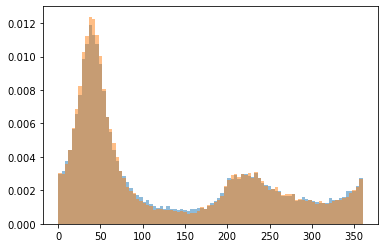

In [7]:
plt.hist(dfR2.linearHead,bins=90, alpha = .5,density=True);
plt.hist(dfR4.linearHead,bins=90,alpha=.5,density=True);

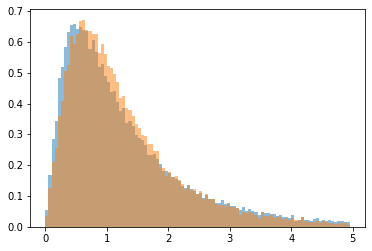

In [8]:
plt.hist(dfR2.linearDist,bins=np.arange(0,5,.05), alpha = .5,density=True);
plt.hist(dfR4.linearDist,bins=np.arange(0,5,.05),alpha=.5,density=True);

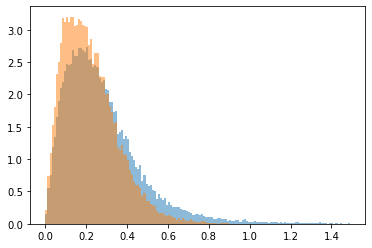

In [9]:
plt.hist(dfR2.linearSpeed,bins=np.arange(0,1.5,.01), alpha = .5,density=True);
plt.hist(dfR4.linearSpeed,bins=np.arange(0,1.5,.01),alpha=.5,density=True);

Major Distance Mean: -0.10764094604853655
Minor Distance STD: 0.7116448107345785
Major Distance Mean: 0.09412192561681108
Minor Distance STD: 0.6880410035299341
Depth Mean: 0.0005966109562052293
Depth STD: 0.03539002581430761
> 3 SD:  0.0052760756682750905 0.0100345616349156
353  out of  5000  rejected with a threshold of 3 degrees
Max:  11.8616 10.2758 0.5522540000000014


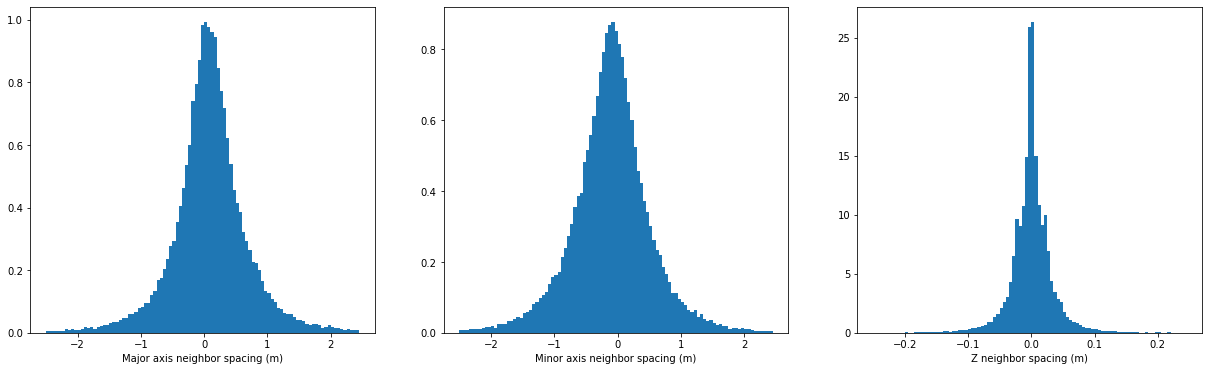

In [157]:
df = dfR2.sample(5000) # Let's get the distances from target to target for a random sample of tracks in all 5 moorings
dft = dfT2
dMin,dMaj,dZ,aF = [],[],[],[]
for index, row in df.iterrows():
    curTrack = dft[(dft.Process_ID==row.Process_ID)&(dft.Region_ID==row.Region_ID)]
    aFlag=0
    for i in range(len(curTrack)-1):
        dMin.append((curTrack.iloc[i+1].Angle_minor_axis - curTrack.iloc[i].Angle_minor_axis)/(curTrack.iloc[i+1].Ping_number - curTrack.iloc[i].Ping_number))
        dMaj.append((curTrack.iloc[i+1].Angle_major_axis - curTrack.iloc[i].Angle_major_axis)/(curTrack.iloc[i+1].Ping_number - curTrack.iloc[i].Ping_number))
        dZ.append((curTrack.iloc[i+1].Target_true_depth - curTrack.iloc[i].Target_true_depth)/(curTrack.iloc[i+1].Ping_number - curTrack.iloc[i].Ping_number))
        if abs(((curTrack.iloc[i+1].Angle_minor_axis - curTrack.iloc[i].Angle_minor_axis)/(curTrack.iloc[i+1].Ping_number - curTrack.iloc[i].Ping_number))) >3:
            aFlag = 1
        if abs(((curTrack.iloc[i+1].Angle_major_axis - curTrack.iloc[i].Angle_major_axis)/(curTrack.iloc[i+1].Ping_number - curTrack.iloc[i].Ping_number))) >3:
            aFlag = 1
    aF.append(aFlag)

df['aFlag'] = aF
fig = plt.figure(figsize=(21,6))        
plt.subplot(131)
plt.hist(dMin,bins=np.arange(-2.5,2.5,.05),density=True)
plt.xlabel('Major axis neighbor spacing (m)')
plt.subplot(132)
plt.hist(dMaj,bins=np.arange(-2.5,2.5,.05),density=True)
plt.xlabel('Minor axis neighbor spacing (m)')
plt.subplot(133)
plt.hist(dZ,bins=np.arange(-.25,.25,.005),density=True)
plt.xlabel('Z neighbor spacing (m)')
print('Major Distance Mean:',np.mean(dMaj))
print('Minor Distance STD:',np.std(dMaj))
print('Major Distance Mean:',np.mean(dMin))
print('Minor Distance STD:',np.std(dMin))
print('Depth Mean:',np.mean(dZ))
print('Depth STD:',np.std(dZ))
dMaj = np.array(dMaj)
dMin = np.array(dMin)
print('> 3 SD: ',len(dMaj[dMaj>np.std(dMaj)*3])/len(dMaj),len(dMin[dMin>np.std(dMin)*3])/len(dMin))
print(len(df[df.aFlag == 1]), ' out of ',len(df), ' rejected with a threshold of 3 degrees')
print('Max: ',np.max(dMaj), np.max(dMin),np.max(dZ))

Major Distance Mean: -0.09802909751112066
Minor Distance STD: 0.6461319068210736
Major Distance Mean: 0.08716409247971556
Minor Distance STD: 0.628828416281513
Depth Mean: 0.00047810540855288184
Depth STD: 0.03033412991159539
> 3 SD:  0.006028064146620848 0.00851947308132875
244  out of  5000  rejected with a threshold of 3 degrees
Max:  11.599 10.921 0.4910560000000004


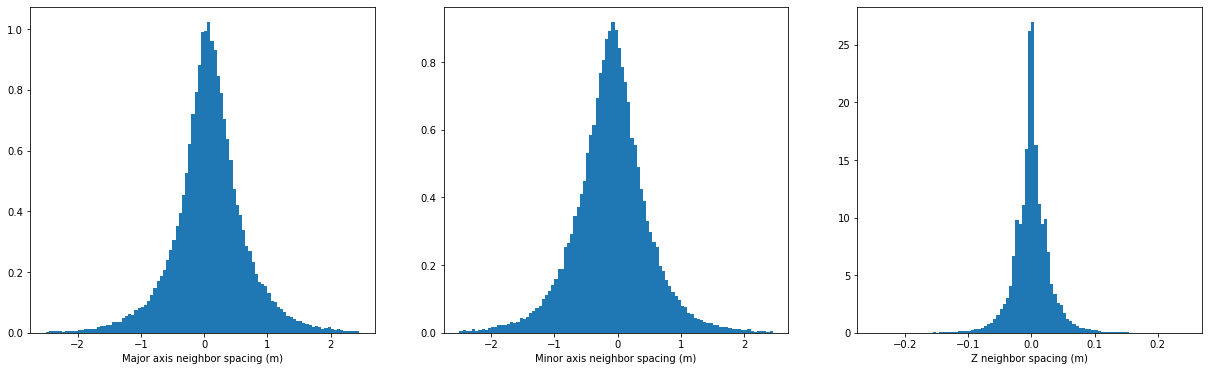

In [171]:
df = dfR4.sample(5000) # Let's get the distances from target to target for a random sample of tracks in all 5 moorings
dft = dfT4
dMin,dMaj,dZ,aF = [],[],[],[]
for index, row in df.iterrows():
    curTrack = dft[(dft.Process_ID==row.Process_ID)&(dft.Region_ID==row.Region_ID)]
    aFlag=0
    for i in range(len(curTrack)-1):
        if len(curTrack.Ping_number.unique()) != len(curTrack.Ping_number):
            aFlag=2
            break
        dMin.append((curTrack.iloc[i+1].Angle_minor_axis - curTrack.iloc[i].Angle_minor_axis)/(curTrack.iloc[i+1].Ping_number - curTrack.iloc[i].Ping_number))
        dMaj.append((curTrack.iloc[i+1].Angle_major_axis - curTrack.iloc[i].Angle_major_axis)/(curTrack.iloc[i+1].Ping_number - curTrack.iloc[i].Ping_number))
        dZ.append((curTrack.iloc[i+1].Target_true_depth - curTrack.iloc[i].Target_true_depth)/(curTrack.iloc[i+1].Ping_number - curTrack.iloc[i].Ping_number))
        if abs(((curTrack.iloc[i+1].Angle_minor_axis - curTrack.iloc[i].Angle_minor_axis)/(curTrack.iloc[i+1].Ping_number - curTrack.iloc[i].Ping_number))) >3:
            aFlag = 1
        if abs(((curTrack.iloc[i+1].Angle_major_axis - curTrack.iloc[i].Angle_major_axis)/(curTrack.iloc[i+1].Ping_number - curTrack.iloc[i].Ping_number))) >3:
            aFlag = 1
    aF.append(aFlag)

df['aFlag'] = aF
fig = plt.figure(figsize=(21,6))        
plt.subplot(131)
plt.hist(dMin,bins=np.arange(-2.5,2.5,.05),density=True)
plt.xlabel('Major axis neighbor spacing (m)')
plt.subplot(132)
plt.hist(dMaj,bins=np.arange(-2.5,2.5,.05),density=True)
plt.xlabel('Minor axis neighbor spacing (m)')
plt.subplot(133)
plt.hist(dZ,bins=np.arange(-.25,.25,.005),density=True)
plt.xlabel('Z neighbor spacing (m)')
print('Major Distance Mean:',np.mean(dMaj))
print('Minor Distance STD:',np.std(dMaj))
print('Major Distance Mean:',np.mean(dMin))
print('Minor Distance STD:',np.std(dMin))
print('Depth Mean:',np.mean(dZ))
print('Depth STD:',np.std(dZ))
dMaj = np.array(dMaj)
dMin = np.array(dMin)
print('> 3 SD: ',len(dMaj[dMaj>np.std(dMaj)*3])/len(dMaj),len(dMin[dMin>np.std(dMin)*3])/len(dMin))
print(len(df[df.aFlag == 1]), ' out of ',len(df), ' rejected with a threshold of 3 degrees')
print('Max: ',np.max(dMaj), np.max(dMin),np.max(dZ))

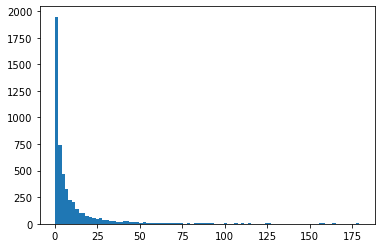

In [176]:
df['headDiff'] =180 - abs(abs(df.linearHead - df.directHead) - 180)
#angle = 180 - abs(abs(dfR4.linearHead - dfR4.directHead) - 180); 
#dfR4.sort_values('headDiff',ascending=False).iloc[:50]
plt.hist(df.headDiff,bins=90);
dfR2['headDiff'] =180 - abs(abs(dfR2.linearHead - dfR2.directHead) - 180)
#angle = 180 - abs(abs(dfR4.linearHead - dfR4.directHead) - 180); 
#dfR4.sort_values('headDiff',ascending=False).iloc[:50]
#plt.hist(dfR2.headDiff,bins=90,density=True);

57


<ipython-input-192-c30659801f16>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



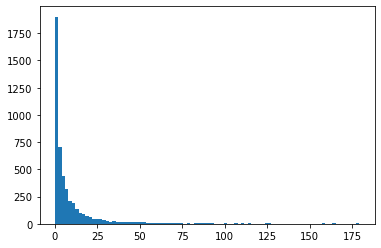

In [192]:
df1 =df[df.aFlag==0]
print(len(df1[df1.headDiff > 100]))
df1['headDiff'] =180 - abs(abs(df1.linearHead - df1.directHead) - 180)
plt.hist(df1.headDiff,bins=90);

69


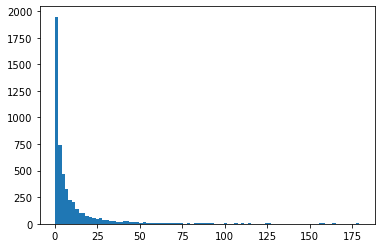

In [191]:
df1 = df
print(len(df1[df1.headDiff > 100]))
df1['headDiff'] =180 - abs(abs(df1.linearHead - df1.directHead) - 180)
plt.hist(df1.headDiff,bins=90);